# Векторные пространства

## Введение

Векторные пространства являются фундаментальным понятием в линейной алгебре. Их часто используют в различных областях таких, как физика, инженеры и компьютерные науки. В NLP векторные пространства помогают моделировать отношения между словами и текстами.

## Основные понятия

### Определение векторного пространства

Векторное пространство (или линейное пространство) — это множество векторов, для которого определены операции сложения и умножения на число, удовлетворяющие определенным аксиомам. 

Пусть $ V $ — векторное пространство над полем $ F $. Тогда для любых векторов $ \mathbf{u}, \mathbf{v} \in V $ и любого скаляра $ c \in F $ выполняются следующие условия:

1. Асоциативность сложения:
   $
   (\mathbf{u} + \mathbf{v}) + \mathbf{w} = \mathbf{u} + (\mathbf{v} + \mathbf{w}) \quad \forall \mathbf{u}, \mathbf{v}, \mathbf{w} \in V
   $
2. Коммутативность сложения:
   $
   \mathbf{u} + \mathbf{v} = \mathbf{v} + \mathbf{u} \quad \forall \mathbf{u}, \mathbf{v} \in V
   $
3. Существование нулевого вектора \( \mathbf{0} \):
   $
   \mathbf{u} + \mathbf{0} = \mathbf{u} \quad \forall \mathbf{u} \in V
   $
4. Существование противоположного вектора:
   $
   \mathbf{u} + (-\mathbf{u}) = \mathbf{0} \quad \forall \mathbf{u} \in V
   $
5. Дистрибутивность относительно скалярного умножения:
   $
   c(\mathbf{u} + \mathbf{v}) = c\mathbf{u} + c\mathbf{v} \quad \forall \mathbf{u}, \mathbf{v} \in V, c \in F
   $
6. Сочетательное свойство умножения на скаляр:
   $
   c(d\mathbf{u}) = (cd)\mathbf{u} \quad \forall \mathbf{u} \in V, c, d \in F
   $
7. Умножение на единичный скаляр:
   $
   1\mathbf{u} = \mathbf{u} \quad \forall \mathbf{u} \in V
   $

### Базис векторного пространства

Базис векторного пространства $ V $ — это множество векторов $ \{\mathbf{e}_1, \mathbf{e}_2, \ldots, \mathbf{e}_n\} $, которые:
1. Линейно независимы.
2. Генерируют все пространство $ V $. 

Это значит, что любой вектор $ \mathbf{v} \in V $ можно выразить через линейную комбинацию базисных векторов:

$
\mathbf{v} = c_1\mathbf{e}_1 + c_2\mathbf{e}_2 + \cdots + c_n\mathbf{e}_n
$

где $ c_1, c_2, \ldots, c_n $ — скаляры.

## Применение в Natural Language Processing (NLP)

В NLP векторные пространства играют важную роль в представлении текста в численном виде, что позволяет применять различные математические методы для обработки и анализа текстов. Одним из популярных методов является **Word Embeddings**.

### Word Embeddings

Word Embeddings — это техника представления слов в виде векторов фиксированной размерности. Эти векторы располагаются таким образом, что семантически сходные слова находятся ближе друг к другу в векторном пространстве.

Примеры популярных моделей для создания Word Embeddings:
1. Word2Vec
2. GloVe (Global Vectors for Word Representation)
3. FastText

Эти методы обучаются на большом корпусе текстов и создают плотные векторы для каждого слова, которые могут быть использованы в различных NLP задачах, таких как кластеризация, классификация текста, машинный перевод и другие.

In [1]:
!pip install gensim --quiet


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


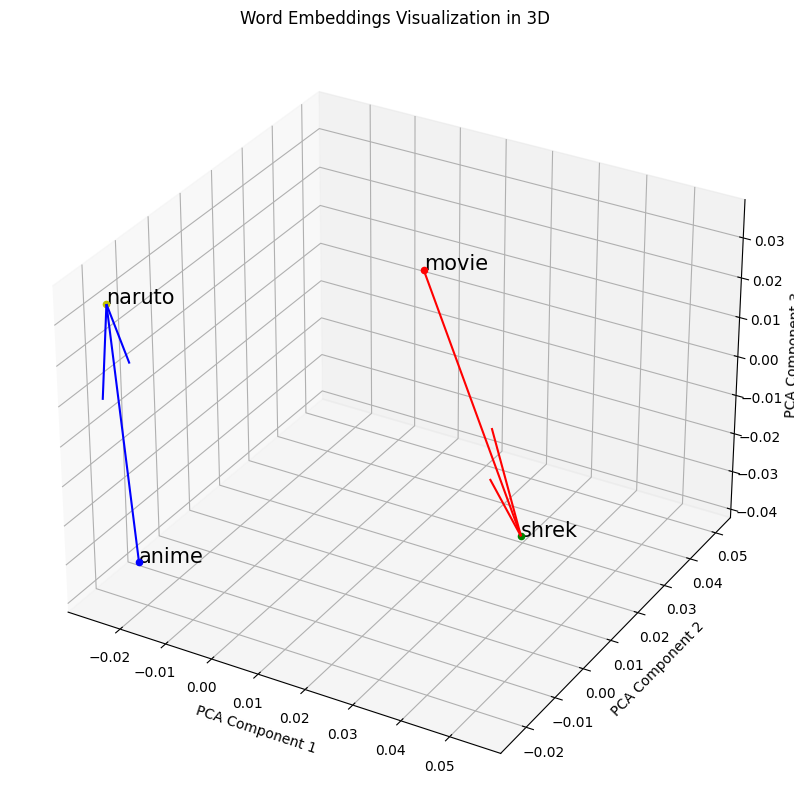

In [2]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Пример корпуса текстов
sentences = [
    ['shrek', 'is', 'the', 'main', 'character', 'of', 'the', 'movie'],
    ['naruto', 'is', 'the', 'main', 'character', 'of', 'the', 'anime'],
    ['movies', 'and', 'anime', 'both', 'have', 'main', 'characters'],
]

# Тренировка модели Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Определение слов для визуализации
words = ["movie", "shrek", "anime", "naruto"]
word_vectors = [model.wv[word] for word in words]

# Использование PCA для уменьшения размерности до 3D для визуализации
pca = PCA(n_components=3)
result = pca.fit_transform(word_vectors)

# Построение графика в 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Построение точек и векторов
colors = ['r', 'g', 'b', 'y']  # Цвета для разных слов

# Отобразить точки
for i, word in enumerate(words):
    ax.scatter(result[i, 0], result[i, 1], result[i, 2], color=colors[i])
    ax.text(result[i, 0], result[i, 1], result[i, 2], word, size=15, zorder=1, color='k')

# Отобразить вектор от "movie" к "shrek"
ax.quiver(result[0, 0], result[0, 1], result[0, 2],
          result[1, 0] - result[0, 0], result[1, 1] - result[0, 1], result[1, 2] - result[0, 2],
          color='r', length=1)

# Отобразить вектор от "anime" к "naruto"
ax.quiver(result[2, 0], result[2, 1], result[2, 2],
          result[3, 0] - result[2, 0], result[3, 1] - result[2, 1], result[3, 2] - result[2, 2],
          color='b', length=1)

# Подписи осей
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.title("Word Embeddings Visualization in 3D")
plt.show()

## Заключение
Векторные пространства являются основополагающим понятием, которое помогает понять и реализовать различные методы в NLP.